# Machine Learning and Computer Vision
## Assigment 6

---

This assignment contains Tensorflow programming exercises.



In [ ]:
import numpy as np
from scipy import linalg


N = 2
t_each = np.array((1, 1.4))
points = np.array([[0,0,0],[1,0,0],[1,1,0]])

# <editor-fold desc="Constraints matrix">
# Set up blank matrix for constraints matrix
epbcond_mat = np.zeros((6, N*6))      # end point boundary conditions
imdpos_mat = np.zeros((2, N*6))       # intermediate positions
continiucon_mat = np.zeros((4, N*6))  # continuity constraints

# Fulfill end point boundary conditions
tn = t_each[-1]
epbcond_mat[0][5] = 1
epbcond_mat[1][4] = 1
epbcond_mat[2][3] = 2
epbcond_mat[3][-6:] = np.array((tn**5, tn**4, tn**3, tn**2, tn, 1))
epbcond_mat[4][-6:] = np.array((5*tn**4, 4*tn**3, 3*tn**2, 2*tn, 1, 0))
epbcond_mat[5][-6:] = np.array((20*tn**3, 12*tn**2, 6*tn**2, 2, 0, 0))

# Fulfill intermediate positions + continuity constraints
in_con_mat = np.zeros(N*6)
for i in range(N-1):
    t_i = t_each[i]
    # intermediate positions for each segment
    seg_imdpos_mat = imdpos_mat
    seg_imdpos_mat[0][i*6:i*6+6] = np.array((t_i**5, t_i**4, t_i**3, t_i**2, t_i, 1))
    seg_imdpos_mat[1][i*6+11] = 1
    # continuity constraints for each segment
    seg_continiucon_mat = continiucon_mat
    seg_continiucon_mat[0][i * 6:i * 6 + 12] = np.array(
        (5*t_i**4, 4*t_i**3, 3*t_i**2, 2*t_i, 1, 0, 0, 0, 0, 0, -1, 0))
    seg_continiucon_mat[1][i * 6:i * 6 + 12] = np.array(
        (20*t_i**3, 12*t_i**2, 6*t_i, 2, 0, 0, 0, 0, 0, -2, 0, 0))
    seg_continiucon_mat[2][i * 6:i * 6 + 12] = np.array(
        (60*t_i**2, 24*t_i, 6, 0, 0, 0, 0, 0, -6, 0, 0, 0))
    seg_continiucon_mat[3][i * 6:i * 6 + 12] = np.array(
        (120*t_i, 24, 0, 0, 0, 0, 0, -24, 0, 0, 0, 0))
    # Stack them together
    seg_mat = np.vstack((seg_imdpos_mat, seg_continiucon_mat))
    in_con_mat = np.vstack((in_con_mat, seg_mat))
# Delete the first row (empty row)
in_con_mat = np.delete(in_con_mat, 0, 0)
# Get the matrix contains all the constraints
constraint_mat = np.vstack((epbcond_mat, in_con_mat))
# </editor-fold>


# <editor-fold desc="state vector">
# the state vector
# end point boundary conditions part
state_vec_end_x = np.array([points[0][0], 0, 0, points[-1][0], 0, 0])
state_vec_end_y = np.array([points[0][1], 0, 0, points[-1][1], 0, 0])
state_vec_end_z = np.array([points[0][2], 0, 0, points[-1][2], 0, 0])

# intermediate positions and continuity constraints part
state_vec_con_x = np.array([points[1][0], points[1][0], 0, 0, 0, 0])
state_vec_con_y = np.array([points[1][1], points[1][1], 0, 0, 0, 0])
state_vec_con_z = np.array([points[1][2], points[1][2], 0, 0, 0, 0])
for i in range(2, N):

    state_vec_con_x = np.hstack((state_vec_con_x,
                                  np.array([points[i][0], points[i][0], 0, 0, 0, 0])))
    state_vec_con_y = np.hstack((state_vec_con_y,
                                  np.array([points[i][1], points[i][1], 0, 0, 0, 0])))
    state_vec_con_z = np.hstack((state_vec_con_z,
                                  np.array([points[i][2], points[i][2], 0, 0, 0, 0])))

# Stack them toghter
state_vec_x = np.hstack((state_vec_end_x, state_vec_con_x))
state_vec_y = np.hstack((state_vec_end_y, state_vec_con_y))
state_vec_z = np.hstack((state_vec_end_z, state_vec_con_z))
# </editor-fold>

print(t_each)
print(epbcond_mat)
print(in_con_mat)

# <editor-fold desc="Solve matrix answer">
con_x = linalg.solve(constraint_mat, state_vec_x)
con_y = linalg.solve(constraint_mat, state_vec_y)
con_z = linalg.solve(constraint_mat, state_vec_z)
# </editor-fold>





[1.  1.4]
[[ 0.       0.       0.       0.       0.       1.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       1.       0.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.       0.       2.       0.       0.       0.       0.
   0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.       5.37824  3.8416
   2.744    1.96     1.4      1.     ]
 [ 0.       0.       0.       0.       0.       0.      19.208   10.976
   5.88     2.8      1.       0.     ]
 [ 0.       0.       0.       0.       0.       0.      54.88    23.52
  11.76     2.       0.       0.     ]]
[[  1.   1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  5.   4.   3.   2.   1.   0.   0.   0.   0.   0.  -1.   0.]
 [ 20.  12.   6.   2.   0.   0.   0.   0.   0.  -2.   0.   0.]
 [ 60.  24.   6.   0.   0.   0.   0.   0.  -6.   0.   0.   0.]
 [120.  24.   0. 

In [ ]:
a = [1,2,3,4,2,3]
A = a[[4,5]]


TypeError: ignored

## Problem 1: Install Tensorflow 
Follow the directions on https://www.tensorflow.org/install/ to install Tensorflow on your computer.

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version. However, if you have a GPU and would like to install GPU support feel free to do so at your own risk :)

Note: On windows, Tensorflow is only supported in python3, so you will need to install python3 for this assignment.

Run the following cell to verify your instalation.

In [ ]:
# Make sure tensorflow version1 code can work in my environment (tensorflow version 2)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


## Problem 2: Downloading CIFAR10
Download the CIFAR10 dataset (http://www.cs.toronto.edu/~kriz/cifar.html). You will need the python version: http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 

Extract the data to ./data
Once extracted run the following cell to view a few example images.

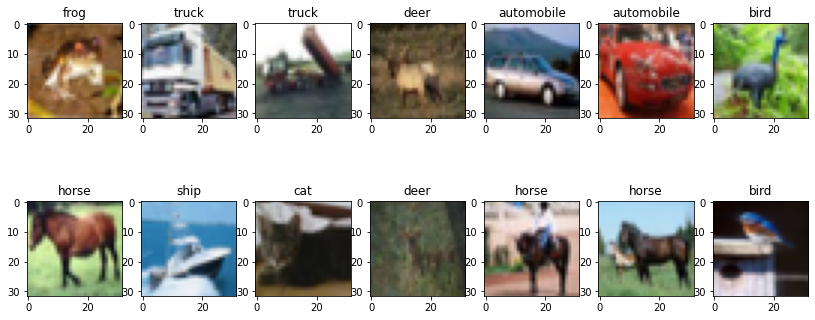

train shape: (50000, 32, 32, 3), (50000,)
test shape : (10000, 32, 32, 3), (10000,)


In [ ]:
import numpy as np

# unpickles raw data files
def unpickle(file):
    import pickle
    import sys
    with open(file, 'rb') as fo:
        if sys.version_info[0] < 3:
            dict = pickle.load(fo)
        else:
           dict = pickle.load(fo, encoding='bytes') 
    return dict

# loads data from a single file
def getBatch(file):
    dict = unpickle(file)
    data = dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)
    labels = np.asarray(dict[b'labels'], dtype=np.int64)
    return data,labels

# loads all training and testing data
def getData(path='/content/Data'):
    classes = [s.decode('UTF-8') for s in unpickle(path+'/batches.meta')[b'label_names']]
    
    trainData, trainLabels = [], []
    for i in range(5):
        data, labels = getBatch(path+'/data_batch_%d'%(i+1))
        trainData.append(data)
        trainLabels.append(labels)
    trainData = np.concatenate(trainData)
    trainLabels = np.concatenate(trainLabels)
    
    testData, testLabels = getBatch(path+'/test_batch')
    return classes, trainData, trainLabels, testData, testLabels

# training and testing data that will be used in the following problems
classes, trainData, trainLabels, testData, testLabels = getData()

# display some example images
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 6))
for i in range(14):
    plt.subplot(2,7,i+1)
    plt.imshow(trainData[i])
    plt.title(classes[trainLabels[i]])
plt.show()

print ('train shape: ' + str(trainData.shape) + ', ' + str(trainLabels.shape))
print ('test shape : ' + str(testData.shape) + ', ' + str(testLabels.shape))

Below are some helper functions that will be used in the following problems.

In [ ]:
# a generator for batches of data
# yields data (batchsize, 3, 32, 32) and labels (batchsize)
# if shuffle, it will load batches in a random order
def DataBatch(data, label, batchsize, shuffle=True):
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

# tests the accuracy of a classifier
def test(testData, testLabels, classifier):
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize):
        prediction = classifier(data)
        #print (prediction)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

# a sample classifier
# given an input it outputs a random class
class RandomClassifier():
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])

randomClassifier = RandomClassifier()
print ('Random classifier accuracy: %f'%test(testData, testLabels, randomClassifier))

Random classifier accuracy: 9.640000


### Why the accuracy of the Random Classifier is always around 10%?

## Problem 3: Confusion Matirx
Here you will implement a test script that computes the confussion matrix for a classifier.
The matrix should be nxn where n is the number of classes.
Entry M[i,j] should contain the number of times an image of class i was classified as class j.
M should be normalized such that each row sums to 1.

Hint: see the function test() above for reference.

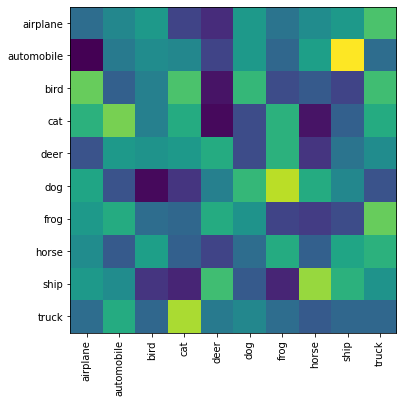

In [ ]:
from sklearn.metrics import confusion_matrix
def confusion(testData, testLabels, classifier):
    """your code here"""
    
    prediction = classifier(testData)  # Get the predicion based on the ramdon classifier
    n = max(testLabels) + 1  # Numbers of kinds of labels (classes)
    M = np.zeros((n, n))  # Form a blank array to restore the data of the confusion Matrix
    
    # Derive the confusion matrix 
    for i in range(len(testLabels)):
        M[testLabels[i]][prediction[i]] += 1.0  # Make sure the element in M is float
        
    # Normalized the confusion matrix
    for i in range(n):
        M[i] = M[i]/sum(M[i])
        
    return M


def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)#, vmin=0, vmax=1)
    plt.xticks(np.arange(len(classes)), classes, rotation='vertical')
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()

M = confusion(testData, testLabels, randomClassifier)
VisualizeConfussion(M)

## Problem 4: K-Nearest Neighbors (KNN)
Here you will implemnet a simple knn classifer. The distance metric is euclidian in pixel space. k refers to the number of neighbors involved in voting on the class.

Hint: you may want to use: sklearn.neighbors.KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
class KNNClassifer():
    def __init__(self, k=3):
        # k is the number of neighbors involved in voting
        """your code here"""
        self.k = k  # Set k to be an object property of KNNClassifer
        
    def train(self, trainData, trainLabels):
        """your code here"""
        trainData_processed = np.reshape(trainData, (trainData.shape[0], -1))  # Process the shape of the data from dim 4 to be dim 2
        self.Kneigh = KNeighborsClassifier(n_neighbors=self.k)  # set the neibor number to be k=3
        self.Kneigh.fit(trainData_processed, trainLabels)  # Train the KNNClassifier
        
    def __call__(self, x):
        # this method should take a batch of images (batchsize, 32, 32, 3) and return a batch of prediction (batchsize)
        # predictions should be int64 values in the range [0,9] corrisponding to the class that the image belongs to
        """your code here"""
        testData_processed = np.reshape(x, (x.shape[0], -1))  # Process the shape of the data from dim 4 to be dim 2
        return self.Kneigh.predict(testData_processed) 


# test your classifier with only the first 100 training examples (use this while debugging)
# note you should get around 10-20% accuracy
knnClassiferX = KNNClassifer()
knnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassiferX))

KNN classifier accuracy: 16.600000


KNN classifier accuracy: 33.030000


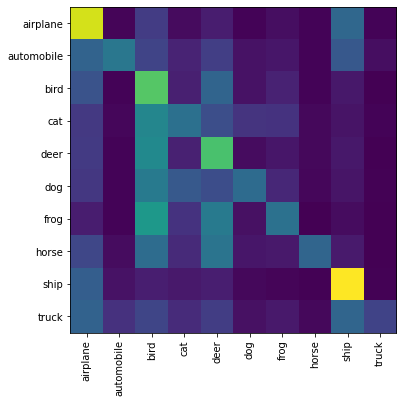

In [ ]:
# test your classifier with all the training examples (This may take a while)
# note you should get around 30% accuracy
knnClassifer = KNNClassifer()
knnClassifer.train(trainData, trainLabels)
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassifer))

# display confusion matrix for your KNN classifier with all the training examples
M = confusion(testData, testLabels, knnClassifer)
VisualizeConfussion(M)

### When I use all the training data to train the classifier, it tooks forever and did not provide a acceptable accuracy. After doing some research, I think we can extract features that are insensitive to the complex and irrelevant environment which can make it more robust. For example, we can extract two features - "color histogram" and "HOG" and combine them to be the final feature vector and data for training and testing a KNN classifier. Nonetheless, the following PCA can also help with improving the efficience and accuracy of the KNN classifier.

## Problem 5: Principal Component Analysis (PCA) K-Nearest Neighbors (KNN)
Here you will implemnet a simple knn classifer in PCA space.
You should implement PCA yourself using svd (you may not use sklearn.decomposition.PCA
or any other package that directly implements PCA transofrmations

Hint: Don't forget to apply the same normalization at test time.

Note: you should get similar accuracy to above, but it should run faster.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
class PCAKNNClassifer():
    def __init__(self, components=25, k=3):
        """your code here"""
        self.n = components
        self.k = k

        
    def train(self, trainData, trainLabels):
        """your code here"""
        # -- PCA ---
        # Step1: Calculate the mean of each feature and Normalization
        Data_processed = np.reshape(trainData, (trainData.shape[0], -1))  # Process the shape of the data from dim 4 to be dim 2
        Data_mean = np.mean(Data_processed,axis=0)
        Data_norm = Data_processed - Data_mean  # Normalization
        # Step2: Derive the Covariance Matrix
        covMat = np.cov(Data_norm,rowvar=0)
        # Step3: Find the eigenvalues and eigenvectors of the Covariance Matrix
        eigVals,eigVects = np.linalg.eig(np.mat(covMat))
        # Step4: Sort and chose the principle components
        eigValIndice = np.argsort(eigVals)
        eigValIndice_principle = eigValIndice[-1:-(self.n+1):-1]
        eigVect_principle = eigVects[:,eigValIndice_principle]
        # Step5: Get the data in the low-dimensional feature space
        Data_PCA = Data_norm*eigVect_principle
        Data_PCA = Data_PCA.real  # I checked the data and found all of them are complex number with zero imaginary part
        
        # Use the data after PCA to train the KNN classifier
        self.Kneigh = KNeighborsClassifier(n_neighbors=self.k)  # set the neibor number to be k=3
        self.Kneigh.fit(Data_PCA, trainLabels)  # Train the KNNClassifier

        
    def __call__(self, x):
        """your code here"""
        # -- PCA ---
        # Step1: Calculate the mean of each feature and Normalization
        Data_processed = np.reshape(x, (x.shape[0], -1))  # Process the shape of the data from dim 4 to be dim 2
        Data_mean = np.mean(Data_processed,axis=0)
        Data_norm = Data_processed - Data_mean  # Normalization
        # Step2: Derive the Covariance Matrix
        covMat = np.cov(Data_norm,rowvar=0)
        # Step3: Find the eigenvalues and eigenvectors of the Covariance Matrix
        eigVals,eigVects = np.linalg.eig(np.mat(covMat))
        # Step4: Sort and chose the principle components
        eigValIndice = np.argsort(eigVals)
        eigValIndice_principle = eigValIndice[-1:-(self.n+1):-1]
        eigVect_principle = eigVects[:,eigValIndice_principle]
        # Step5: Get the data in the low-dimensional feature space
        Data_PCA = Data_norm*eigVect_principle
        Data_PCA = Data_PCA.real  # I checked the data and found all of them are complex number with zero imaginary part

        return self.Kneigh.predict(Data_PCA) 

        
    
# test your classifier with only the first 100 training examples (use this while debugging)
pcaknnClassiferX = PCAKNNClassifer()
pcaknnClassiferX.train(trainData[:100], trainLabels[:100])
print ('PCA-KNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassiferX))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

PCA-KNN classifier accuracy: 10.810000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### PCA Steps:
### Step1: Calculate the mean and normalization
### Step2: Derive the Covariance Matrix
### Step3: Find the eigenvalues and eigenvectors of the Covariance Matrix
### Step4: Sort and chose the principle components
### Step5: Get the data in the low-dimensional feature space

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

KNN classifier accuracy: 12.940000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


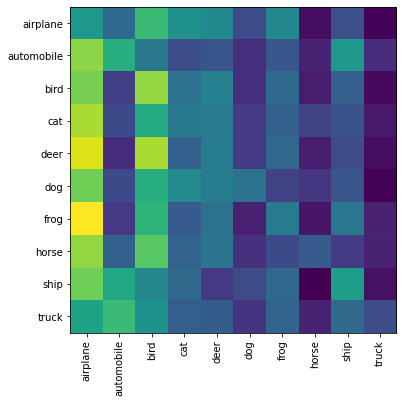

In [ ]:
# test your classifier with all the training examples (This may take a few minutes)
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(trainData, trainLabels)
print ('KNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassifer))

# display the confusion matrix
M = confusion(testData, testLabels, pcaknnClassifer)
VisualizeConfussion(M)

## Deep learning
Below is some helper code to train your deep networks

Hint: see https://www.tensorflow.org/get_started/mnist/pros or https://www.tensorflow.org/get_started/mnist/beginners for reference

testing epoch:1 accuracy: 25.620000
testing epoch:2 accuracy: 25.390000
testing epoch:3 accuracy: 23.570000
testing epoch:4 accuracy: 29.070000
testing epoch:5 accuracy: 25.250000
testing epoch:6 accuracy: 28.740000
testing epoch:7 accuracy: 26.190000
testing epoch:8 accuracy: 23.220000
testing epoch:9 accuracy: 26.760000
testing epoch:10 accuracy: 24.210000
testing epoch:11 accuracy: 28.030000
testing epoch:12 accuracy: 27.760000
testing epoch:13 accuracy: 23.730000
testing epoch:14 accuracy: 23.030000
testing epoch:15 accuracy: 29.230000
testing epoch:16 accuracy: 28.080000
testing epoch:17 accuracy: 28.280000
testing epoch:18 accuracy: 29.090000
testing epoch:19 accuracy: 28.660000
testing epoch:20 accuracy: 30.920000


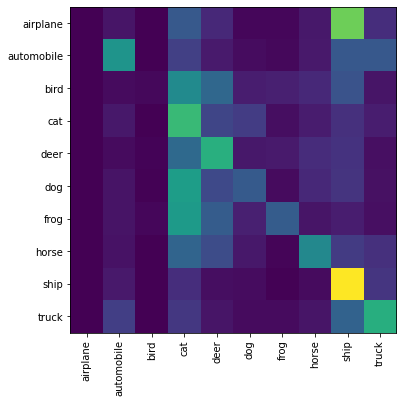

In [ ]:
# base class for your Tensorflow networks. It implements the training loop (train) and prediction(__call__)  for you.
# You will need to implement the __init__ function to define the networks structures in the following problems
class TFClassifier():
    def __init__(self):
        pass
    
    def train(self, trainData, trainLabels, epochs=1, batchsize=50):
        self.prediction = tf.argmax(self.y,1)
        self.cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.y_, logits=self.y))
        self.train_step = tf.train.AdamOptimizer(1e-4).minimize(self.cross_entropy)
        self.correct_prediction = tf.equal(self.prediction, self.y_)
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        
        self.sess.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            for i, (data,label) in enumerate(DataBatch(trainData, trainLabels, batchsize, shuffle=True)):
                _, acc = self.sess.run([self.train_step, self.accuracy], feed_dict={self.x: data, self.y_: label})
                #if i%100==99:
                #    print ('%d/%d %d %f'%(epoch, epochs, i, acc))
                    
            print ('testing epoch:%d accuracy: %f'%(epoch+1, test(testData, testLabels, self)))
        
    def __call__(self, x):
        return self.sess.run(self.prediction, feed_dict={self.x: x})

# helper function to get weight variable
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

# helper function to get bias variable
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# example linear classifier
class LinearClassifer(TFClassifier):
    def __init__(self, classes=10):
        self.sess = tf.Session()

        self.x = tf.placeholder(tf.float32, shape=[None,32,32,3]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels

        # model variables
        self.W = weight_variable([32*32*3,classes])
        self.b = bias_variable([classes])

        # linear operation
        self.y = tf.matmul(tf.reshape(self.x,(-1,32*32*3)),self.W) + self.b
        
# test the example linear classifier (note you should get around 20-30% accuracy)
linearClassifer = LinearClassifer()
linearClassifer.train(trainData, trainLabels, epochs=20)

# display confusion matrix
M = confusion(testData, testLabels, linearClassifer)
VisualizeConfussion(M)

## Problem 6: Multi Layer Perceptron (MLP)
Here you will implement an MLP. The MLP shoud consist of 3 linear layers (matrix multiplcation and bias offset) that map to the following feature dimensions:

32x32x3 -> hidden

hidden -> hidden

hidden -> classes

The first two linear layers should be followed with a ReLU nonlinearity. The final layer should not have a nonlinearity applied as we desire the raw logits output (see: the documentation for tf.nn.sparse_softmax_cross_entropy_with_logits used in the training)

The final output of the computation graph should be stored in self.y as that will be used in the training.

Hint: see the example linear classifier

Note: you should get around 50% accuracy

## No need to use softmax since "tf.nn.sparse_softmax_cross_entropy_with_logits" used in the training (need the raw unscaled logits) $\rightarrow$ Only need to set the two hidden layers. The softmax layer is integrated in "tf.nn.sparse_softmax_cross_entropy_with_logits".

## I did some research about this method and found that it can provide a better numerical stability since "tf.nn.sparse_softmax_cross_entropy_with_logits" is "$xent(p,q) = -\sum\limits_{k} p(k)log(q(k))$". The "$log(q(k))$" is accutally LogSoftmax which is much easier to calculate than Softmax and can provide better numerical stability.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
testing epoch:1 accuracy: 38.610000
testing epoch:2 accuracy: 42.540000
testing epoch:3 accuracy: 43.670000
testing epoch:4 accuracy: 44.960000
testing epoch:5 accuracy: 46.110000
testing epoch:6 accuracy: 46.870000
testing epoch:7 accuracy: 45.780000
testing epoch:8 accuracy: 46.710000
testing epoch:9 accuracy: 47.600000
testing epoch:10 accuracy: 49.000000
testing epoch:11 accuracy: 49.360000
testing epoch:12 accuracy: 48.940000
testing epoch:13 accuracy: 48.440000
testing epoch:14 accuracy: 49.970000
testing epoch:15 accuracy: 49.470000
testing epoch:16 accuracy: 49.360000
testing epoch:17 accuracy: 48.730000
testing epoch:18 accuracy: 48.610000
testing epoch:19 accuracy: 49.750000
testing epoch:20 accuracy: 50.660000


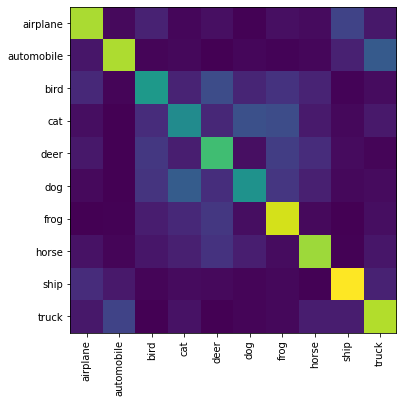

In [ ]:
class MLPClassifer(TFClassifier):
    def __init__(self, classes=10, hidden=100):
        self.sess = tf.Session()

        self.x = tf.placeholder(tf.float32, shape=[None,32,32,3]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels

        """your code here"""
        # (Placeholder(cancelled)) Value for dropout layer
        keep_prob = 1.0
        # model variables
        self.W0 = weight_variable([32*32*3,hidden])
        self.b0 = bias_variable([hidden])
        self.W1 = weight_variable([hidden,hidden])
        self.b1 = bias_variable([hidden])
        self.W2 = weight_variable([hidden,classes])
        self.b2 = bias_variable([classes])

        # Set up the structure of the model (layers)
        hidden1 = tf.nn.relu(tf.matmul(tf.reshape(self.x,(-1,32*32*3)), self.W0) + self.b0) 
        hidden1_drop = tf.nn.dropout(hidden1, keep_prob) 
        hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, self.W1) + self.b1) 
        hidden2_drop = tf.nn.dropout(hidden2, keep_prob) 
        # No need to use softmax since tf.nn.sparse_softmax_cross_entropy_with_logits used in the training (need the raw unscaled logits)
        self.y = tf.matmul(hidden2_drop,self.W2) + self.b2  

        

# test your MLP classifier (note you should get around 50% accuracy)
mlpClassifer = MLPClassifer()
mlpClassifer.train(trainData, trainLabels, epochs=20)

# display confusion matrix
M = confusion(testData, testLabels, mlpClassifer)
VisualizeConfussion(M)

## Problem 7: Convolutional Neural Netork (CNN)
Here you will implement a CNN with the following architecture:

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n) )

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n*2) )

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n*4) )

Linear(output_features=classes)

#### Output height = (Input height + padding height top + padding height bottom - kernel height) / (stride height) + 1

#### Output width = (Output width + padding width right + padding width left - kernel width) / (stride width) + 1

testing epoch:1 accuracy: 43.540000
testing epoch:2 accuracy: 48.560000
testing epoch:3 accuracy: 53.140000
testing epoch:4 accuracy: 55.280000
testing epoch:5 accuracy: 56.600000
testing epoch:6 accuracy: 58.540000
testing epoch:7 accuracy: 58.640000
testing epoch:8 accuracy: 58.150000
testing epoch:9 accuracy: 61.650000
testing epoch:10 accuracy: 62.570000
testing epoch:11 accuracy: 62.410000
testing epoch:12 accuracy: 63.480000
testing epoch:13 accuracy: 63.250000
testing epoch:14 accuracy: 63.440000
testing epoch:15 accuracy: 63.170000
testing epoch:16 accuracy: 64.050000
testing epoch:17 accuracy: 64.790000
testing epoch:18 accuracy: 64.480000
testing epoch:19 accuracy: 63.830000
testing epoch:20 accuracy: 64.700000


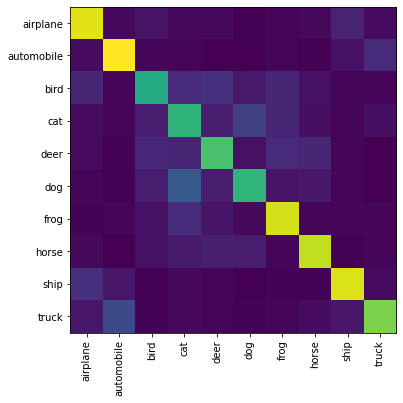

In [ ]:
def conv2d(x, W, stride=2):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')

class CNNClassifer(TFClassifier):
    def __init__(self, classes=10, n=16):
        self.sess = tf.Session()

        self.x = tf.placeholder(tf.float32, shape=[None,32,32,3]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels

        """your code here"""
        # model variables
        self.W1 = weight_variable([4, 4, 3, n])  # Conv #1
        self.b1 = bias_variable([n])  # ReLU #1
        self.W2 = weight_variable([4, 4, n, n*2])  # Conv #2
        self.b2 = bias_variable([n*2])  # ReLU #2
        self.W3 = weight_variable([4, 4, n*2, n*4])  # Conv #3
        self.b3 = bias_variable([n*4])  # ReLU #3
        self.W_linear = weight_variable([4*4*n*4,classes])  # Linear
        self.b_linear = bias_variable([classes])  # Linear

        # Set up the structure of the model (layers)
        Layer1 = tf.nn.relu(conv2d(self.x, self.W1, stride=2) + self.b1)
        Layer2 = tf.nn.relu(conv2d(Layer1, self.W2, stride=2) + self.b2)
        Layer3 = tf.nn.relu(conv2d(Layer2, self.W3, stride=2) + self.b3)
        # No need to use softmax since tf.nn.sparse_softmax_cross_entropy_with_logits used in the training (need the raw unscaled logits)
        self.y = tf.matmul(tf.reshape(Layer3,(-1,4*4*n*4)),self.W_linear) + self.b_linear  


# test your CNN classifier (note you should get around 65% accuracy)
cnnClassifer = CNNClassifer()
cnnClassifer.train(trainData, trainLabels, epochs=20)

# display confusion matrix
M = confusion(testData, testLabels, cnnClassifer)
VisualizeConfussion(M)

## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

--




## Further reference
To see how state of the art deep networks do on this dataset see: https://github.com/tensorflow/models/tree/master/research/resnet